### QUESTION 2


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.io
import numpy as np
mat_file = scipy.io.loadmat('final.mat')
data = mat_file['DataMatrix'][()]
df = pd.DataFrame(data)
data_with_label= df
df=df.drop(df.columns[27], axis=1)
Original_Data= df
df.shape


(41, 27)

### PCA 

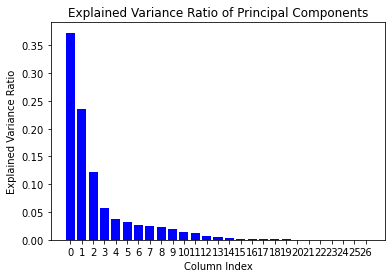

In [119]:
pca = PCA()
X_reduced = pca.fit_transform(df)
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(np.arange(len(explained_variance_ratio)), explained_variance_ratio, color='blue')
plt.xlabel('Column Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(len(explained_variance_ratio)))
plt.show()

In [120]:
explained_variance_ratio.cumsum()

array([0.37274356, 0.60867554, 0.7316082 , 0.78890848, 0.82678023,
       0.85830202, 0.88580063, 0.91021776, 0.9335716 , 0.9529777 ,
       0.96666632, 0.97923167, 0.98568521, 0.99027762, 0.9933198 ,
       0.99497452, 0.9962517 , 0.99747494, 0.99823823, 0.9987877 ,
       0.99928951, 0.99963161, 0.99991398, 1.        , 1.        ,
       1.        , 1.        ])

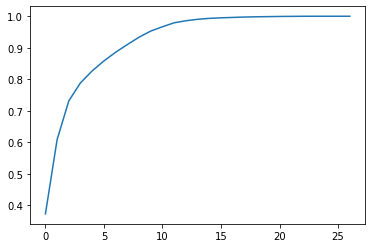

In [121]:
plt.plot(explained_variance_ratio.cumsum())

### Data preprocessing


#### Apply a normalized scaler

In [122]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(Original_Data)

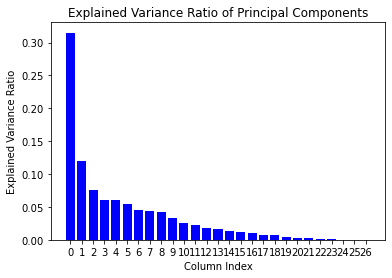

In [123]:
### apply PCA for the normaized data
pca2 = PCA()
X_reduced_2 = pca2.fit_transform(df_scaled)
explained_variance_ratio_2 = pca2.explained_variance_ratio_
plt.bar(np.arange(len(explained_variance_ratio)), explained_variance_ratio_2, color='blue')
plt.xlabel('Column Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(len(explained_variance_ratio)))
plt.show()

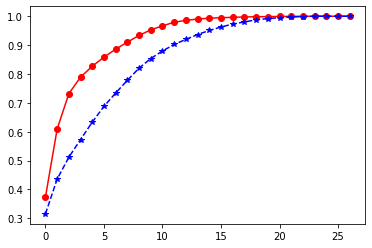

In [124]:
plt.plot(explained_variance_ratio.cumsum(), 'r-o', label='Line 1')
plt.plot(explained_variance_ratio_2.cumsum(), 'b--*', label='Line 2')

### Try New scaller 

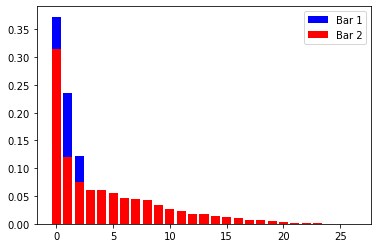

In [125]:
# Create some data for the first bar plot
x1 = np.arange(len(explained_variance_ratio))
y1 = explained_variance_ratio

# Create some data for the second bar plot
x2 = np.arange(len(explained_variance_ratio_2))
y2 = explained_variance_ratio_2

# Plot the first bar plot
plt.bar(x1, y1, color='blue', label='Bar 1')

# Plot the second bar plot
plt.bar(x2, y2, color='red', label='Bar 2')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [126]:
explained_variance_ratio_2.cumsum()

array([0.31494525, 0.43541527, 0.51142108, 0.57267174, 0.63285724,
       0.68780056, 0.73378297, 0.77805061, 0.82012271, 0.85354733,
       0.8794629 , 0.90240771, 0.91961707, 0.93664676, 0.95061571,
       0.96280495, 0.97286336, 0.98029176, 0.98753439, 0.99179182,
       0.99505289, 0.99717377, 0.99904485, 1.        , 1.        ,
       1.        , 1.        ])

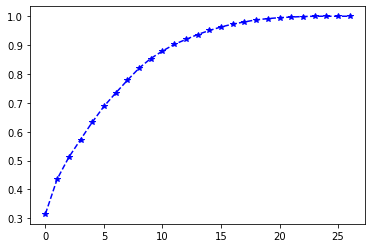

In [146]:

plt.plot(explained_variance_ratio_2.cumsum(), 'b--*', label='Preprocessed')


### Handle Outliers

In [128]:
Outlier = Original_Data
# Calculate the z-score for each value in the dataframe
z_scores = (Outlier - Outlier.mean()) / Outlier.std()
# Identify the rows with outliers
outliers = (np.abs(z_scores) > 3).any(axis=1)
# Remove the rows with outliers
df_without_outliers = df[~outliers]
df_without_outliers.shape



(29, 27)

### resulted a data frame with 29 rows so 12 rows were removed from original data


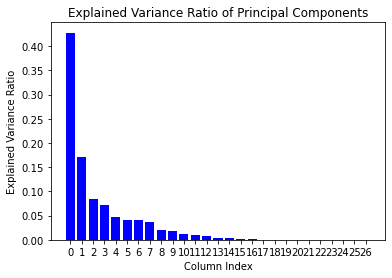

In [129]:
pca3 = PCA()
X_reduced_3 = pca3.fit_transform(df_without_outliers)
explained_variance_ratio_3 = pca3.explained_variance_ratio_
plt.bar(np.arange(len(explained_variance_ratio_3)), explained_variance_ratio_3, color='blue')
plt.xlabel('Column Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(len(explained_variance_ratio)))
plt.show()

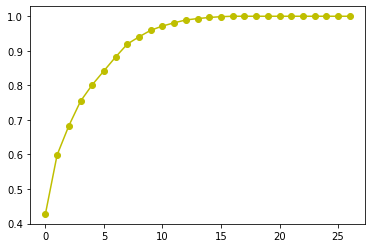

In [147]:
plt.plot(explained_variance_ratio_3.cumsum(), 'y-o', label='Outliers removed')


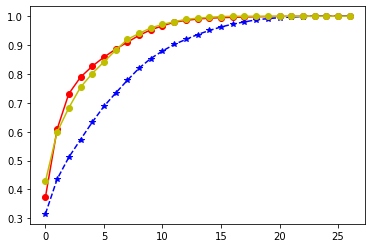

In [130]:
plt.plot(explained_variance_ratio.cumsum(), 'r-o', label='raw')
plt.plot(explained_variance_ratio_2.cumsum(), 'b--*', label='Preprocessed')
plt.plot(explained_variance_ratio_3.cumsum(), 'y-o', label='Outliers removed')


In [131]:
X_reduced= pd.DataFrame(X_reduced)
X_reduced_2=pd.DataFrame(X_reduced_2)
X_reduced_3=pd.DataFrame(X_reduced_3)
X_reduced["label"]=data_with_label.iloc[:,27]
X_reduced_2["label"]=data_with_label.iloc[:,27]
X_reduced_3["label"]=data_with_label.iloc[:,27]


In [132]:
df_list = [X_reduced, X_reduced_2, X_reduced_3]

# Use a for loop to iterate over the dataframes
for df in df_list:
    # Change all the elements in the 'label' column from 1 to 2 and 2 to 1
    df['label'].replace({2:1, 4:3}, inplace=True)
    df['label'].replace({3:2}, inplace=True)


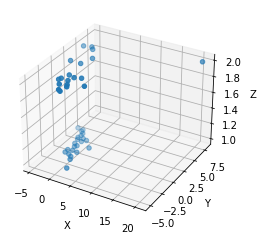

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced.iloc[:,0], X_reduced.iloc[:,1], X_reduced['label'])

# Add labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

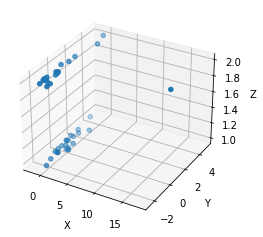

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced_2.iloc[:,0], X_reduced_2.iloc[:,1], X_reduced['label'])

# Add labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

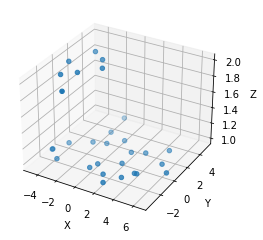

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced_3.iloc[:,0], X_reduced_3.iloc[:,1], X_reduced_3['label'])

# Add labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()